<a href="https://colab.research.google.com/github/shLithium/2020kidneyDisease/blob/main/2021Kidneydisease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Predicting Chronic Kidney Disease**

Data used in this prediction is sourced from Kaggle. 

Objective: Predict as best as possible the occurnece of the kidney disease using various other given health data.

Tasks:
- Sourcing data
- Exploratory data dnalysis
- Selection of classification models and hyperparameters
- Optimization of model hyperparameters
- feature selection
- Analysis of model performance
- metrics selection

Algorithms used in this notebook are: 
1.   Support vector machine
2.   K-Nearest Neighbour
3.   Decision tree, and
4.   Random forest



Attribute Information:
(https://archive.ics.uci.edu/ml/datasets/Chronic_Kidney_Disease)

We use 24 + class = 25 ( 11 numeric ,14 nominal)
1.Age(numerical)
age in years

2.Blood Pressure(numerical)
bp in mm/Hg

3.Specific Gravity(nominal)
sg - (1.005,1.010,1.015,1.020,1.025)

4.Albumin(nominal)
al - (0,1,2,3,4,5)

5.Sugar(nominal)
su - (0,1,2,3,4,5)

6.Red Blood Cells(nominal)
rbc - (normal,abnormal)

7.Pus Cell (nominal)
pc - (normal,abnormal)

8.Pus Cell clumps(nominal)
pcc - (present,notpresent)

9.Bacteria(nominal)
ba - (present,notpresent)

10.Blood Glucose Random(numerical)
bgr in mgs/dl

11.Blood Urea(numerical)
bu in mgs/dl

12.Serum Creatinine(numerical)
sc in mgs/dl

13.Sodium(numerical)
sod in mEq/L

14.Potassium(numerical)
pot in mEq/L

15.Hemoglobin(numerical)
hemo in gms

16.Packed Cell Volume(numerical)

17.White Blood Cell Count(numerical)
wc in cells/cumm

18.Red Blood Cell Count(numerical)
rc in millions/cmm

19.Hypertension(nominal)
htn - (yes,no)

20.Diabetes Mellitus(nominal)
dm - (yes,no)

21.Coronary Artery Disease(nominal)
cad - (yes,no)

22.Appetite(nominal)
appet - (good,poor)

23.Pedal Edema(nominal)
pe - (yes,no)

24.Anemia(nominal)
ane - (yes,no)

25.Class (nominal)
class - (ckd,notckd)

# Libraries Used

In [574]:
# libraries to be used

import pandas as pd
import pandas as pd
import numpy as np
import datetime as dt

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

from sklearn import preprocessing

from sklearn.model_selection import train_test_split
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

#from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import roc_auc_score
#from sklearn.metrics import plot_roc_curve
from sklearn.metrics import roc_curve

# **Sourcing data**

Original source of the data is https://archive.ics.uci.edu/ml/datasets/Chronic_Kidney_Disease . This data was also present in Kaggle (kaggle.com/colearninglounge/chronic-kidney-disease). Here, I am sourcing the data from kaggle.

In [ ]:
# to use kaggle API to download data from Kaggle
#! pip install kaggle

In [3]:
# using google drive for storage of kaggle data
from google.colab import drive
drive.mount('/content/drive/')
! mkdir ~/.kaggle
! mkdir kaggledata

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [4]:
# copy kaggle.json to new dir in google drive to use kaggle API
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json

In [284]:
# get dataset --> kaggle.com/colearninglounge/chronic-kidney-disease
! kaggle datasets download mansoordaku/ckdisease

# extract csv in the google drive directory
! unzip /content/ckdisease.zip -d kaggledata

ckdisease.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  /content/ckdisease.zip
  inflating: kaggledata/kidney_disease.csv  


In [602]:
data = pd.read_csv("/content/kaggledata/kidney_disease.csv")

# **Data Overview**

In [603]:
# raname attributes for easy readablity
data.columns = ['id',
              'age', 
              'blood_pressure', 
              'specific_gravity', 
              'albumin', 
              'sugar', 
              'red_blood_cells', 
              'pus_cell', 
              'pus_cell_clumps', 
              'bacteria', 
              'blood_glucose_random', 
              'blood_urea', 
              'serum_creatinine', 
              'sodium', 
              'potassium', 
              'haemoglobin', 
              'packed_cell_volume', 
              'white_blood_cell_count', 
              'red_blood_cell_count',
              'hypertension', 
              'diabetes_mellitus', 
              'coronary_artery_disease', 
              'appetite', 
              'peda_edema',
              'anemia', 
              'class']

In [604]:
data.apply(lambda col: col.unique())

id                         [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...
age                        [48.0, 7.0, 62.0, 51.0, 60.0, 68.0, 24.0, 52.0...
blood_pressure             [80.0, 50.0, 70.0, 90.0, nan, 100.0, 60.0, 110...
specific_gravity                      [1.02, 1.01, 1.005, 1.015, nan, 1.025]
albumin                                  [1.0, 4.0, 2.0, 3.0, 0.0, nan, 5.0]
sugar                                    [0.0, 3.0, 4.0, 1.0, nan, 2.0, 5.0]
red_blood_cells                                      [nan, normal, abnormal]
pus_cell                                             [normal, abnormal, nan]
pus_cell_clumps                                   [notpresent, present, nan]
bacteria                                          [notpresent, present, nan]
blood_glucose_random       [121.0, nan, 423.0, 117.0, 106.0, 74.0, 100.0,...
blood_urea                 [36.0, 18.0, 53.0, 56.0, 26.0, 25.0, 54.0, 31....
serum_creatinine           [1.2, 0.8, 1.8, 3.8, 1.4, 1.1, 24.0, 1.9, 7.2,...

In [605]:
# Shape of the dataframe
print ("dataframe shape:\n", data.shape)

# datatypes of the columns
print ("\nAttributes:\n",data.dtypes)

dataframe shape:
 (400, 26)

Attributes:
 id                           int64
age                        float64
blood_pressure             float64
specific_gravity           float64
albumin                    float64
sugar                      float64
red_blood_cells             object
pus_cell                    object
pus_cell_clumps             object
bacteria                    object
blood_glucose_random       float64
blood_urea                 float64
serum_creatinine           float64
sodium                     float64
potassium                  float64
haemoglobin                float64
packed_cell_volume          object
white_blood_cell_count      object
red_blood_cell_count        object
hypertension                object
diabetes_mellitus           object
coronary_artery_disease     object
appetite                    object
peda_edema                  object
anemia                      object
class                       object
dtype: object


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


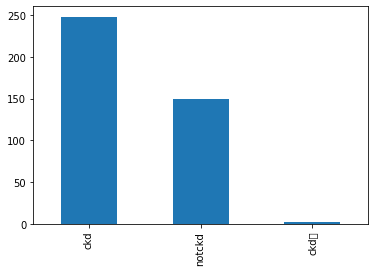

In [590]:
# class balance of label
data['class'].value_counts().plot(kind='bar')

In [591]:
data.isna().sum()

id                           0
age                          9
blood_pressure              12
specific_gravity            47
albumin                     46
sugar                       49
red_blood_cells            152
pus_cell                    65
pus_cell_clumps              4
bacteria                     4
blood_glucose_random        44
blood_urea                  19
serum_creatinine            17
sodium                      87
potassium                   88
haemoglobin                 52
packed_cell_volume          70
white_blood_cell_count     105
red_blood_cell_count       130
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
peda_edema                   1
anemia                       1
class                        0
dtype: int64

In [592]:
# Number of NULL values in each column
data = data.replace('nan', np.nan)

# Remove records with missing target 
data = data[pd.notnull(data['class'])]

# Remove column
data = data.drop(['id'], axis=1)

In [593]:
data = data.astype({
    'specific_gravity': 'str',
    'albumin': 'str',
    'sugar': 'str',
    'red_blood_cells': 'str',
    'pus_cell': 'str',
    'pus_cell_clumps': 'str',
    'bacteria': 'str',
    'hypertension': 'str',
    'diabetes_mellitus': 'str',
    'coronary_artery_disease': 'str',
    'appetite': 'str',
    'peda_edema': 'str',
    'anemia': 'str'})

data['white_blood_cell_count'] = pd.to_numeric(data['white_blood_cell_count'],errors='coerce')
data['red_blood_cell_count'] = pd.to_numeric(data['red_blood_cell_count'],errors='coerce')

<p>The target attribute is binary. We want the positive case 'ckd' to always be set as positive or 1 when mapping. Algorithms like Support Vector Machine sets the first example as positive. In order to avoid this, we manually define positive and negative examples.</p>


In [594]:
target = 'class'
data[target] = data[target].map({'ckd': 1, 'notckd': 0})

# **Data Exploration**

In [595]:
data

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,anemia,class
0,48.0,80.0,1.02,1.0,0.0,nan,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800.0,5.2,yes,yes,no,good,no,no,1.0
1,7.0,50.0,1.02,4.0,0.0,nan,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000.0,NaN,no,no,no,good,no,no,1.0
2,62.0,80.0,1.01,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500.0,NaN,no,yes,no,poor,no,yes,1.0
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700.0,3.9,yes,no,no,poor,yes,yes,1.0
4,51.0,80.0,1.01,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300.0,4.6,no,no,no,good,no,no,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.02,0.0,0.0,normal,normal,notpresent,notpresent,140.0,49.0,0.5,150.0,4.9,15.7,47,6700.0,4.9,no,no,no,good,no,no,0.0
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,31.0,1.2,141.0,3.5,16.5,54,7800.0,6.2,no,no,no,good,no,no,0.0
397,12.0,80.0,1.02,0.0,0.0,normal,normal,notpresent,notpresent,100.0,26.0,0.6,137.0,4.4,15.8,49,6600.0,5.4,no,no,no,good,no,no,0.0
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,50.0,1.0,135.0,4.9,14.2,51,7200.0,5.9,no,no,no,good,no,no,0.0


Text(0.5, 1.0, 'Pair Plots of Numeric Attributes')

<Figure size 1800x1440 with 0 Axes>

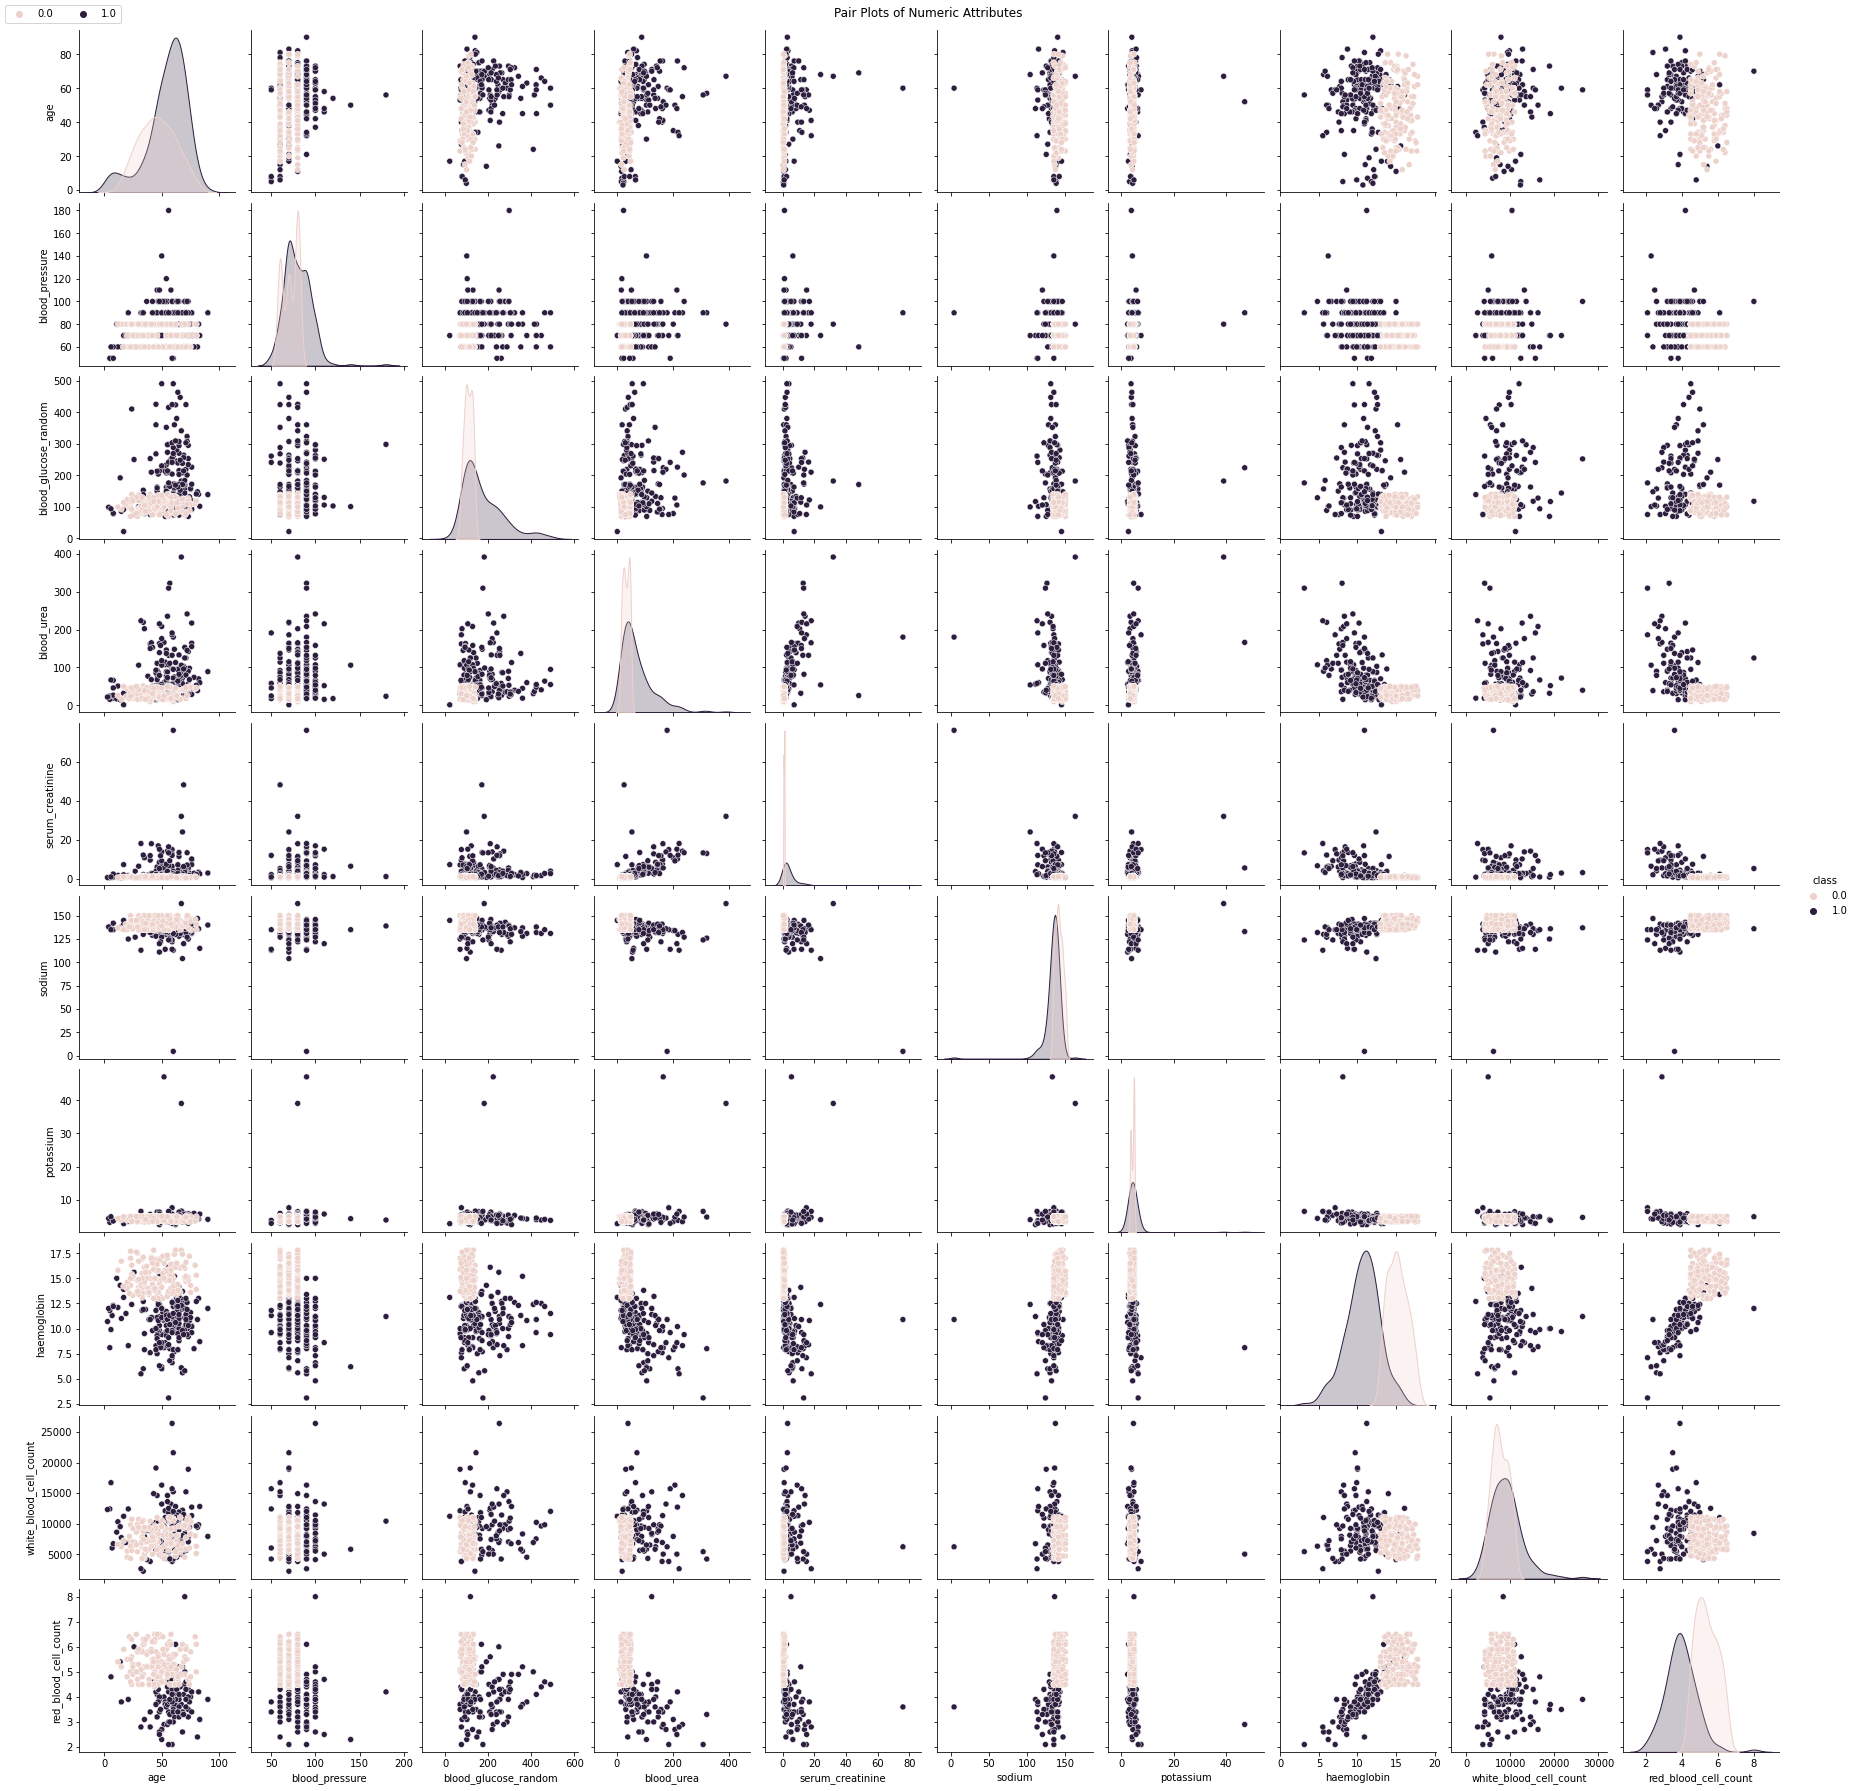

In [596]:
plt.figure(figsize=(25,20))
g = sns.pairplot(data.iloc[:,:],  hue='class', corner = False)

handles = g._legend_data.values()
labels = g._legend_data.keys()

g.fig.legend(handles=handles, labels=labels, loc='upper left', ncol=data['class'].nunique())
g.fig.suptitle('Pair Plots of Numeric Attributes', y=1.0)

> From the pair-plots, we see that measurements of healthy examples are concentrated to certain values/range, whereas measurements of examples with disease are more spread out. This observation can be used as for initial evaluation to guess whether a paitent may have kidney disease. However, we need to confirm how the data of healthy individuals were collected as to ensure that there is no biasness in this data.

In [597]:
data2 = data.copy()
data2 

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,anemia,class
0,48.0,80.0,1.02,1.0,0.0,nan,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800.0,5.2,yes,yes,no,good,no,no,1.0
1,7.0,50.0,1.02,4.0,0.0,nan,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000.0,NaN,no,no,no,good,no,no,1.0
2,62.0,80.0,1.01,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500.0,NaN,no,yes,no,poor,no,yes,1.0
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700.0,3.9,yes,no,no,poor,yes,yes,1.0
4,51.0,80.0,1.01,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300.0,4.6,no,no,no,good,no,no,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.02,0.0,0.0,normal,normal,notpresent,notpresent,140.0,49.0,0.5,150.0,4.9,15.7,47,6700.0,4.9,no,no,no,good,no,no,0.0
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,31.0,1.2,141.0,3.5,16.5,54,7800.0,6.2,no,no,no,good,no,no,0.0
397,12.0,80.0,1.02,0.0,0.0,normal,normal,notpresent,notpresent,100.0,26.0,0.6,137.0,4.4,15.8,49,6600.0,5.4,no,no,no,good,no,no,0.0
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,50.0,1.0,135.0,4.9,14.2,51,7200.0,5.9,no,no,no,good,no,no,0.0


In [598]:
numeric_data = data2.select_dtypes(include='number')
numeric_data['class'] = data['class']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [599]:
numeric_data

,age,blood_pressure,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,white_blood_cell_count,red_blood_cell_count,class
0,48.0,80.0,121.0,36.0,1.2,NaN,NaN,15.4,7800.0,5.2,1.0
1,7.0,50.0,NaN,18.0,0.8,NaN,NaN,11.3,6000.0,NaN,1.0
2,62.0,80.0,423.0,53.0,1.8,NaN,NaN,9.6,7500.0,NaN,1.0
3,48.0,70.0,117.0,56.0,3.8,111.0,2.5,11.2,6700.0,3.9,1.0
4,51.0,80.0,106.0,26.0,1.4,NaN,NaN,11.6,7300.0,4.6,1.0
...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,140.0,49.0,0.5,150.0,4.9,15.7,6700.0,4.9,0.0
396,42.0,70.0,75.0,31.0,1.2,141.0,3.5,16.5,7800.0,6.2,0.0
397,12.0,80.0,100.0,26.0,0.6,137.0,4.4,15.8,6600.0,5.4,0.0
398,17.0,60.0,114.0,50.0,1.0,135.0,4.9,14.2,7200.0,5.9,0.0


Comparitive distribution of numeric attributes.


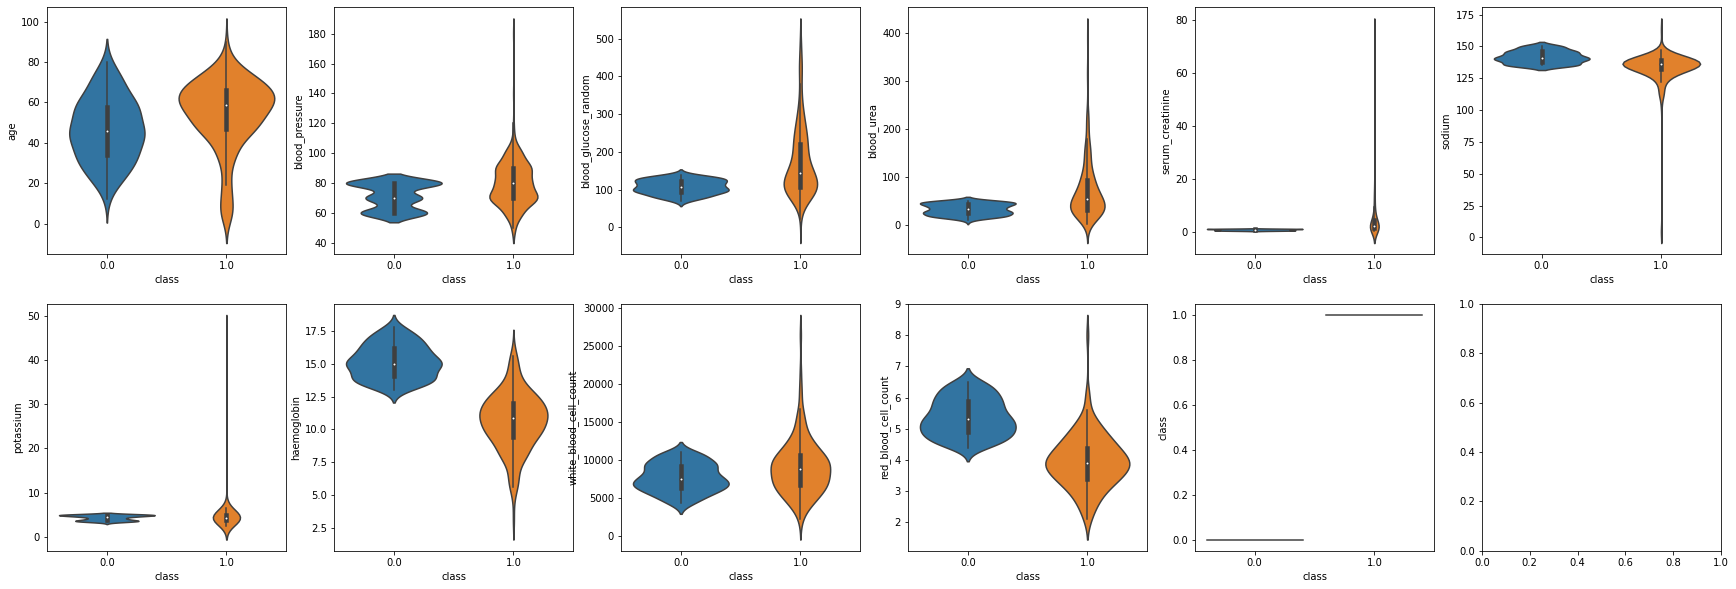

In [600]:
## violin plot. Check distribution of attributes in positive(1) and negative(0) classes 
print ("Comparitive distribution of numeric attributes.")

attribute_list = list(numeric_data.columns)
count = 0 

cols = 6 #number of cols for subplots
rows = int(np.ceil(len(attribute_list)/cols)) #number of rows for subplots
fig, axs = plt.subplots(rows, cols, figsize=(cols*5, rows*5))

for j in range(0, rows):
  for k in range(0, cols):
    if (count>len(attribute_list)-1):
      break
    sns.violinplot(x = 'class', y = attribute_list[count], data = numeric_data, ax = axs[j, k])
    count += 1

> Comparing the positive and negative cases, we see that the measurements of patients with kidney disease are out of certain range. We can hypothesize that patients whose measurements in one or more of the attributes are out of range are likely to suffer from the disease. 



In [301]:
# non numeric attributes
cols = data2.columns
num_cols = data2._get_numeric_data().columns
cat_attr = list(set(cols) - set(num_cols))

cat_attr.remove('class')

In [302]:
from pandas.api.types import is_numeric_dtype
for col in data2:
  if (not(is_numeric_dtype(data2[col])) and not(col=='class')):
    data2[col]= data2[col].replace({'\t':''}, regex=True)

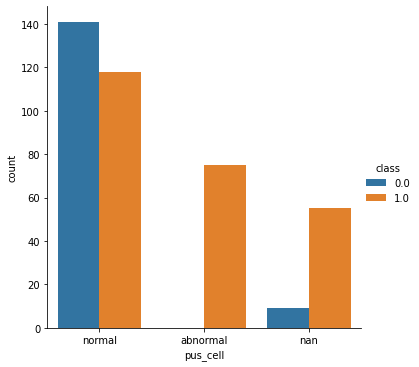

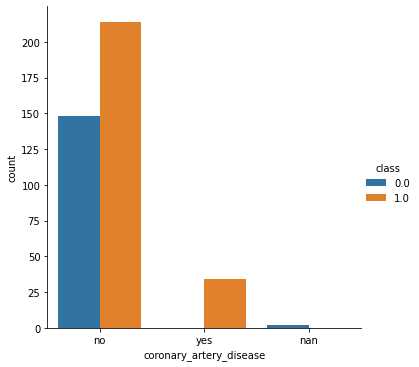

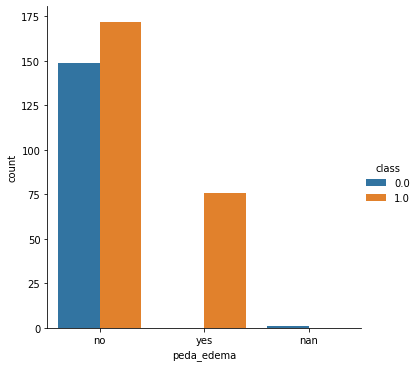

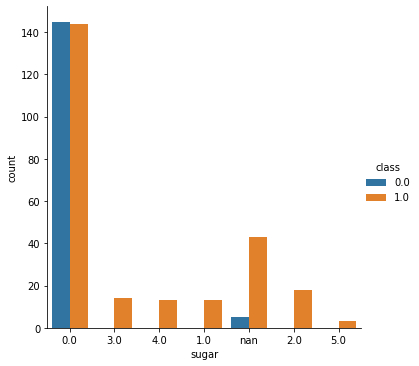

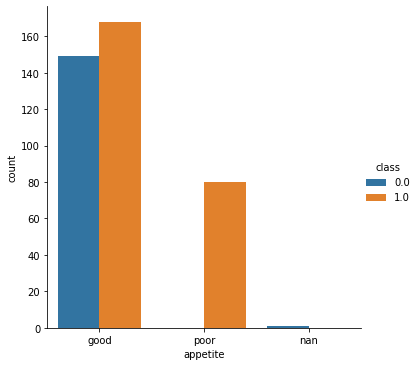

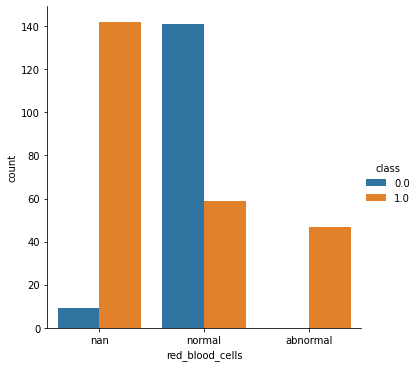

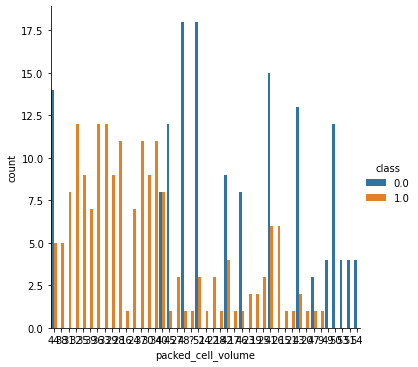

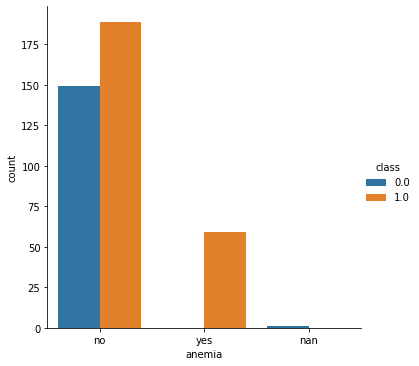

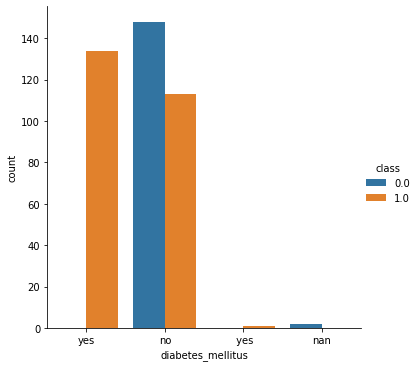

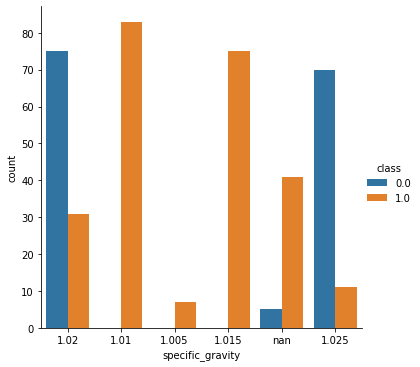

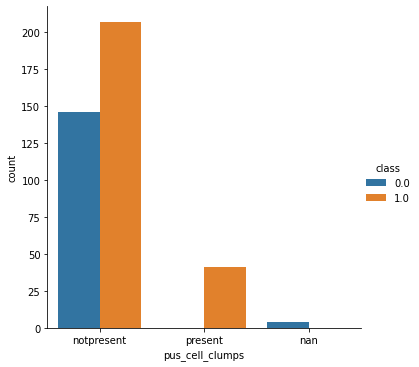

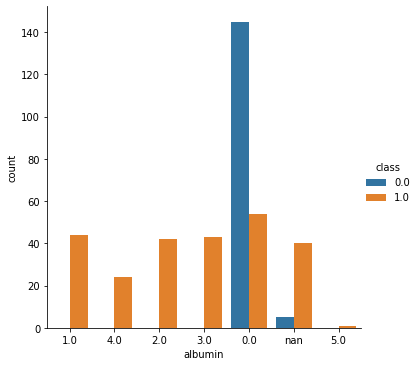

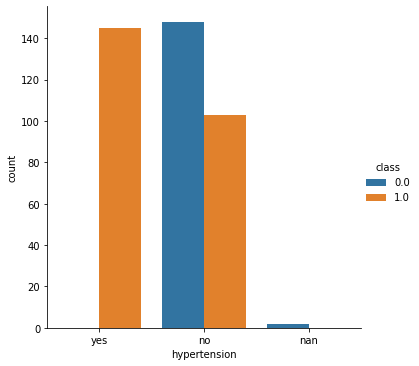

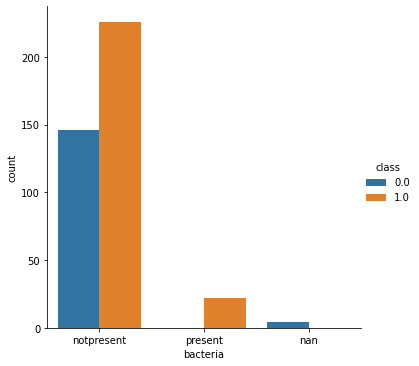

In [303]:

count = 0 
cols = 6 #number of cols for subplots
rows = int(np.ceil(len(cat_attr)/cols)) #number of rows for subplots

for j in range(0, rows):
  for k in range(0, cols):
    if (count>len(cat_attr)-1):
      break
    sns.catplot(x=cat_attr[count], hue="class", kind="count", data=data2)
    count += 1

Comparing healthy and diseased class, we see that healthy examples are limited to certain values/ range. Individuals whose measurements fall out of this value/ range in all of the attributes are highly likely to have kidney disease. 

# Data Preparation

In [533]:
data = pd.read_csv("/content/kaggledata/kidney_disease.csv")

In [534]:
# Remove column
if 'id' in data.columns:
  data = data.drop(['id'], axis=1)

# raname attributes for easy readablity
data.columns = ['age', 
              'blood_pressure', 
              'specific_gravity', 
              'albumin', 
              'sugar', 
              'red_blood_cells', 
              'pus_cell', 
              'pus_cell_clumps', 
              'bacteria', 
              'blood_glucose_random', 
              'blood_urea', 
              'serum_creatinine', 
              'sodium', 
              'potassium', 
              'haemoglobin', 
              'packed_cell_volume', 
              'white_blood_cell_count', 
              'red_blood_cell_count',
              'hypertension', 
              'diabetes_mellitus', 
              'coronary_artery_disease', 
              'appetite', 
              'peda_edema',
              'anemia', 
              'class']

In [535]:
# clean data --> remove tab('\t) from cells
for col in data:
  if (not(is_numeric_dtype(data[col]))):
    data[col]= data[col].replace({'\t':''}, regex=True)

In [536]:
# Set numeric attributes
num_attr = ['age','blood_pressure','specific_gravity','albumin','sugar','blood_glucose_random','blood_urea','serum_creatinine',
            'sodium','potassium','haemoglobin','packed_cell_volume','white_blood_cell_count','red_blood_cell_count']

data[num_attr] = data[num_attr].apply(pd.to_numeric, errors='coerce')

In [537]:
data = data[pd.notnull(data['class'])]
data = data.dropna()

In [538]:
## Dummy encoding --> Since all categorical data are binary.
# Categorical attributes
cat_attr = ['red_blood_cells','pus_cell','pus_cell_clumps','bacteria','hypertension',
            'diabetes_mellitus','coronary_artery_disease','appetite','peda_edema','anemia', 'class']

data.columns = data.columns.str.lower() # lowercase
data.columns = data.columns.str.strip() # trim spaces
data.columns = data.columns.str.replace(' ', '') # remove in-value spaces
data = data.replace('nan', np.nan)
data = data.replace('', np.nan)

# Define values for mapping
dict_cat_values = {'yes': 1, 
                   'no': 0,
                   'good': 1,
                   'poor': 0,
                   'present': 1,
                   'notpresent': 0,
                   'normal': 1,
                   'abnormal':0,
                   'ckd':1,
                   'notckd':0}

# map categorical values t0 0/1,
for col in cat_attr:
    data[col] = data[col].map(dict_cat_values)

data

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,anemia,class
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,1,0,0,0,1,1,1
9,53.0,90.0,1.020,2.0,0.0,0,0,1,0,70.0,107.0,7.2,114.0,3.7,9.5,29.0,12100.0,3.7,1,1,0,0,0,1,1
11,63.0,70.0,1.010,3.0,0.0,0,0,1,0,380.0,60.0,2.7,131.0,4.2,10.8,32.0,4500.0,3.8,1,1,0,0,1,0,1
14,68.0,80.0,1.010,3.0,2.0,1,0,1,1,157.0,90.0,4.1,130.0,6.4,5.6,16.0,11000.0,2.6,1,1,1,0,1,0,1
20,61.0,80.0,1.015,2.0,0.0,0,0,0,0,173.0,148.0,3.9,135.0,5.2,7.7,24.0,9200.0,3.2,1,1,1,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,1,1,0,0,140.0,49.0,0.5,150.0,4.9,15.7,47.0,6700.0,4.9,0,0,0,1,0,0,0
396,42.0,70.0,1.025,0.0,0.0,1,1,0,0,75.0,31.0,1.2,141.0,3.5,16.5,54.0,7800.0,6.2,0,0,0,1,0,0,0
397,12.0,80.0,1.020,0.0,0.0,1,1,0,0,100.0,26.0,0.6,137.0,4.4,15.8,49.0,6600.0,5.4,0,0,0,1,0,0,0
398,17.0,60.0,1.025,0.0,0.0,1,1,0,0,114.0,50.0,1.0,135.0,4.9,14.2,51.0,7200.0,5.9,0,0,0,1,0,0,0


# **Functions for processing**

In [539]:
# Score function to evaluate training performance
scoring = ['f1', 'roc_auc', 'precision', 'recall']

In [540]:
# Imputer missing value
impute = IterativeImputer(random_state=0)

# Linear scaling [0,1]
min_max_scaler = preprocessing.MinMaxScaler()

In [541]:
# define features and target
target='class'
features_names = list(data.columns)
features_names.remove(target) #remove the target from list

features = data[features_names]
target = data[target]

In [542]:
def model_result(features, target, clf):
    '''
    Returns:
    - results (scores on train and validation) of cross-validation using classifier model
    - set of best_param, 
    - best_score of the best param, 
    - best_estimator model, 
    - y test split, 
    - y predicted
    
    
    Parameters:
    - features set
    - target
    - classifer
    '''
    xtrain, xtest, ytrain, ytest = train_test_split(features, 
                                                    target.values, 
                                                    test_size=0.25, 
                                                    random_state=1)
    xtrain = impute.fit_transform(xtrain)
    xtest= impute.transform(xtest)

    xtrain = min_max_scaler.fit_transform(xtrain)
    xtest = min_max_scaler.transform(xtest)
    
    clf.fit(xtrain, ytrain)
    
    results = clf.cv_results_
    best_param = clf.best_params_
    best_score = clf.best_score_
    best_estimator = clf.best_estimator_
    
    ypred = clf.predict(xtest)
    ypred = np.reshape(ypred, np.shape(ytest))
    
    return results, best_param, best_score, best_estimator, ytest, ypred

In [543]:
def tabulate_results(clf_results):
    '''
    parameter: dict of results from model
    function: tabulates the dict results into dataframe
    returns: results in dataframe
    '''
    df = pd.DataFrame.from_dict(clf_results)
    
    param_cols = list(df.loc[:,df.columns.str.startswith('param_')].columns)
    
    df1 = df.filter(param_cols)
    df2 = df.filter(['rank_test_f1',
                    'mean_train_f1',
                    'mean_test_f1',
                    'rank_test_roc_auc',
                    'mean_train_roc_auc',
                    'mean_test_roc_auc',
                    'rank_test_precision',
                    'mean_train_precision',
                    'mean_test_precision',
                    'rank_test_recall',
                    'mean_test_recall',
                    'mean_train_recall'])
    
    df = pd.concat([df1, df2], axis=1, sort=False)
    
    return df

In [544]:
def plot_perf(df):
    '''
    parameter: take results df from tabulate_results()
    function: plot the performance of model parameters on training and valisation sets. x axis set to df index.
    return: df with parameters combinations 
    '''
    df.plot(use_index=True, 
        y=['mean_test_f1', 'mean_train_f1','mean_train_roc_auc','mean_test_roc_auc'], 
        figsize=(20,5), 
        grid=False, 
        xticks=df.index,
        alpha = 0.5
       )
    plt.xticks(rotation=0)
    plt.xlabel('ID for Parameter combinations')
    plt.ylabel('Score')
    plt.title('Parameter combinations with best scores.')
    plt.show()
    return df[df.columns[pd.Series(df.columns).str.startswith('param_')]]

In [545]:
test_perf = pd.DataFrame(columns=['model',
                                 'Accuracy',
                                 'F1-score',
                                 'AUC',
                                 'Precision',
                                 'Recall'])

def model_perf(model, ytest, ypred):
    '''
    Returns performance matrics of model
        1. dataframe with Acc, f1, AUC, Precision, Recall
        2. Confusion matrix
    
    Parameters: 
         model name (str)
         true y
         predicted y
    
    '''
    global test_perf
    
    acc         = accuracy_score(ytest, ypred)
    f1score     = f1_score(ytest, ypred)
    auc         = roc_auc_score(ytest, ypred)
    prec        = precision_score(ytest, ypred)
    rec         = recall_score(ytest, ypred)
    conf_matrix = confusion_matrix(ytest, ypred)
    
    print('Accuracy         :{}\n'.format(acc))
    print('f1-score         :{}\n'.format(f1score))
    print('AUC              :{}\n'.format(auc))
    print('Precision        :{}\n'.format(prec))
    print('Recall           :{}\n'.format(rec))
    print('confusion matrix :\n{}\n'.format(conf_matrix))
    
    test_perf = test_perf.append({'model':model,
                                  'Accuracy':acc,
                                  'F1-score': f1score,
                                  'AUC':auc,
                                  'Precision':prec,
                                  'Recall':rec}, ignore_index=True)
    
    test_perf = test_perf.drop_duplicates(subset ='model')
    
    return conf_matrix

# Classification Models

**Performance metric:**
Assuming that the primary objective is to correctly classify positive cases of CKD, F1 score is suitable. Because F1 is harmonic mean of precision and recall, it accounts for both Recall and Precision, both of which gives a proportion of true positive cases. AUC is another suitable metric. Since AUC considers TPR and FPR, it gives a meausre of reliablity of model.

Importance is given for True Positives here because misclassifying disaease case is more expensie than misclassifying non-positive case.

F1 score also is a better metric when class is imbalnced.

**Model Selection:**
 SVM, KNN, Logistic regression and tree based models. Reasons:
 - The pair-plots of the attributes and the data distribution in different classes show some distinction between the classes.
 - target is binary
 - features are numerical

**Design:**
GridSearchCV() was used to perform exhaustive search over specified parameter values for an estimator (SVC). It takes dictionary of hyperparameter values, so using loops is not necessary. A range of scoring methods are selected to evaluate the predictions on the test set. The parameters of the estimator used to apply these methods are optimized by cross-validated grid-search over a parameter grid. GridSearchCV uses StratifiedKFold if the estimator is a classifier and y is either binary or multiclass, for integer/None inputs. StratifiedKFold was used to validate the scores obtained in training.

Since SVM, KNN do not handle missing values, they were either imputed with mean values using IterativeImputer or ommited. It estimates each feature from all the others features. Features were also scaled because SVM, KNN are distance based models.

## 1. Support Vector Machine

In [546]:
# Hyperparameter

# kernel type to be used in the algorithm. Transforms Low-dimension input into a higher-dimensional space. Useful in non-linear separation problem. Most simple data are linear problem.
kernel = ['linear', 'poly', 'rbf', 'sigmoid']

# Regularization parameter. Represents misclassification or error term. 
#High value of C means high penalty for misclassification. So, learnt margin will be narrower which means small number of support vectors. 
# The misclassification or error term tells the SVM optimisation how much error is bearable.
C = list(range(10,200,10))

# Degree of the polynomial kernel function
degree = [2, 3, 4]

# Kernel coefficient for ‘rbf’ and ‘poly’. 
#When gamma is higher, nearby points will have high influence; low gamma means far away points also be considered to get the decision boundary.
gamma = ['auto', 'scale', 0.01]

##################################################################
hyperparameters = dict(kernel = kernel, 
                       degree = degree,
                       gamma = gamma,
                       C = C
                      )

##################################################################

# Best parameters for Random Forest using GridSearchCV                  
svm_clf = GridSearchCV(svm.SVC(random_state=100), 
                   hyperparameters, 
                   scoring=scoring,
                   cv=10, 
                   refit='f1',
                   return_train_score=True
                  )

In [ ]:
svm_results, svm_best_param, svm_best_score, svm_best_estimator, svm_ytest, svm_ypred = model_result(features, 
                                                                                                     target, 
                                                                                                     clf = svm_clf)


In [ ]:
svm_train_results = tabulate_results(svm_results)
svm_train_results

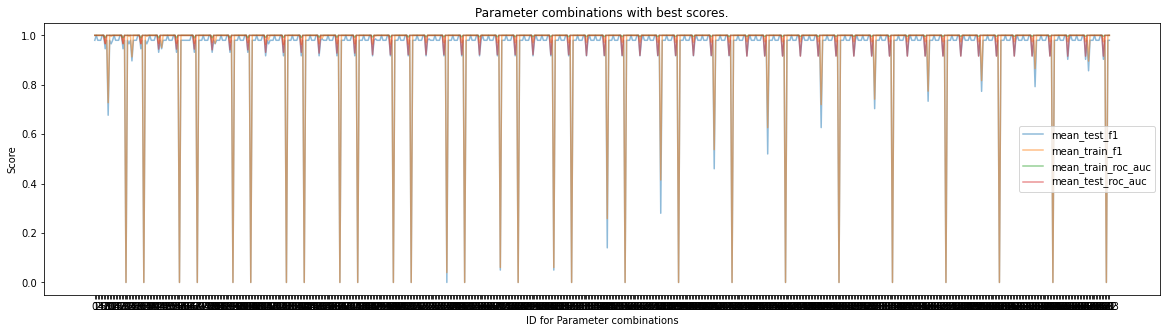

,param_C,param_degree,param_gamma,param_kernel
0,10,2,auto,linear
1,10,2,auto,poly
2,10,2,auto,rbf
3,10,2,auto,sigmoid
4,10,2,scale,linear
...,...,...,...,...
679,190,4,scale,sigmoid
680,190,4,0.01,linear
681,190,4,0.01,poly
682,190,4,0.01,rbf


In [549]:
plot_perf(svm_train_results)

In [550]:
print('Best model:\n',svm_best_estimator,'\n')
print('Best parameters:\n',svm_best_param)

Best model:
 SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
    max_iter=-1, probability=False, random_state=100, shrinking=True, tol=0.001,
    verbose=False) 

Best parameters:
 {'C': 10, 'degree': 2, 'gamma': 'auto', 'kernel': 'poly'}


In [551]:
model='SVM'
model_perf(model, svm_ytest, svm_ypred)

Accuracy         :1.0

f1-score         :1.0

AUC              :1.0

Precision        :1.0

Recall           :1.0

confusion matrix :
[[29  0]
 [ 0 11]]



array([[29,  0],
       [ 0, 11]])

## 2. K-Nearest Neighbour

In [552]:
# hyperparameters

# Controls the number of samples at which a query switches to brute-force
leaf_size = list(range(1,50))

# Number of neighbors to use
n_neighbors = list(range(1,30))

# weight function used in prediction. 
# If value is 'distance', then closer points have more influence in determining the class. 
# If 'uniform', then all n number of closest neighbours have equal influence.
weights = ['uniform', 'distance']

# Algorithm used to compute the nearest neighbors
algorithm = ['auto'] 

# p = 1 --> manhattan_distance. p = 2 --> euclidean_distance.
p=[1,2]

##################################################################
hyperparameters = dict(leaf_size=leaf_size, 
                       n_neighbors=n_neighbors,
                       weights=weights,
                       algorithm=algorithm,
                       p=p)
##################################################################

# Best parameters for KNN using GridSearchCV
                    
knn_clf = GridSearchCV(KNeighborsClassifier(), 
                   hyperparameters, 
                   scoring=scoring,
                   cv=10, 
                   refit='f1',
                   return_train_score=True
                  )


In [553]:
knn_results, knn_best_param, knn_best_score, knn_best_estimator, knn_ytest, knn_ypred = model_result(features, 
                                                                                     target, 
                                                                                     clf = knn_clf)

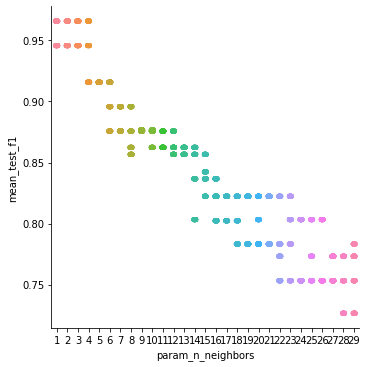

In [554]:
knn_train_results = tabulate_results(knn_results)

sns.catplot(x='param_n_neighbors', y='mean_test_f1', jitter=True, data=knn_train_results)

In [555]:
print('Best model:\n',knn_best_estimator,'\n')
print('Best parameters:\n',knn_best_param)

Best model:
 KNeighborsClassifier(algorithm='auto', leaf_size=1, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=1,
                     weights='uniform') 

Best parameters:
 {'algorithm': 'auto', 'leaf_size': 1, 'n_neighbors': 1, 'p': 1, 'weights': 'uniform'}


In [556]:
model='KNN'
model_perf(model, knn_ytest, knn_ypred)

Accuracy         :1.0

f1-score         :1.0

AUC              :1.0

Precision        :1.0

Recall           :1.0

confusion matrix :
[[29  0]
 [ 0 11]]



array([[29,  0],
       [ 0, 11]])

## 3. Decision Trees

In [557]:
## # Hyperparameters

# Function to measure the quality of a split. 
# 'gini' for the Gini impurity and 'entropy' for the information gain.
criterion = ['gini', 'entropy']

# The maximum depth of the tree.
max_depth =[None, 4, 5, 6, 7, 8]

# The minimum number of samples required to split an internal node.
min_samples_split = list(range(10,data.shape[0],20))

# The minimum number of samples required to be at a leaf node.
min_samples_leaf = list(range(10,50,5))

##################################################################
hyperparameters = dict(criterion=criterion, 
                       max_depth=max_depth,
                       min_samples_split = min_samples_split,
                       min_samples_leaf = min_samples_leaf)

##################################################################

# Best parameters for Decision Tree using GridSearchCV
dt_clf = GridSearchCV(DecisionTreeClassifier(random_state=100), 
                   hyperparameters, 
                   scoring=scoring,
                   cv=10, 
                   refit='f1',
                   return_train_score=True
                  )

In [ ]:
dt_results, dt_best_param, dt_best_score, dt_best_estimator, dt_ytest, dt_ypred = model_result(features, 
                                                                                     target, 
                                                                                     clf = dt_clf)


In [559]:
dt_train_results = tabulate_results(dt_results)

In [560]:
print('Best model:\n',dt_best_estimator,'\n')
print('Best parameters:\n',dt_best_param)

Best model:
 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=30, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best') 

Best parameters:
 {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 30, 'min_samples_split': 10}


In [561]:
model='decision tree'
perf, conf_matrix = model_perf(model, dt_ytest, dt_ypred)


Accuracy         :0.975

f1-score         :0.9523809523809523

AUC              :0.9545454545454546

Precision        :1.0

Recall           :0.9090909090909091

confusion matrix :
[[29  0]
 [ 1 10]]



## 4. Random Forests

In [562]:
# Hyperparameters

# Number of trees in the forest.
n_estimators = list(range(50,150,30))

# Function to measure the quality of a split
# 'gini' for the Gini impurity and 'entropy' for the information gain.
criterion = ['gini', 'entropy']

# Maximum depth of the tree.
max_depth =[4, 5, 6, 7, 8]

# Minimum number of samples required to split an internal node.
min_samples_split = list(range(5,data.shape[0],5))

# Minimum number of samples required to be at a leaf node.
min_samples_leaf = list(range(2,10,1))

# Number of features to consider when looking for the best split
max_features = ['sqrt', 'log2']

##################################################################
hyperparameters = dict(n_estimators=n_estimators, 
                       criterion=criterion,
                       max_depth=max_depth,
                       #min_samples_split=min_samples_split,
                       min_samples_leaf=min_samples_leaf,
                       max_features=max_features)

##################################################################

# Best parameters for Random Forest using GridSearchCV                  
rf_clf = GridSearchCV(RandomForestClassifier(random_state=100), 
                   hyperparameters, 
                   scoring=scoring,
                   cv=10, 
                   refit='f1',
                   return_train_score=True
                  )

In [563]:
rf_results, rf_best_param, rf_best_score, rf_best_estimator, rf_ytest, rf_ypred = model_result(features, 
                                                                                     target, 
                                                                                     clf = rf_clf)


In [564]:
rf_train_results = tabulate_results(rf_results)

In [565]:
print('Best model:\n',rf_best_estimator,'\n')
print('Best parameters:\n',rf_best_param)

Best model:
 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=4, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=100,
                       verbose=0, warm_start=False) 

Best parameters:
 {'criterion': 'gini', 'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'n_estimators': 50}


In [566]:
model='Random forests'
perf, conf_matrix = model_perf(model, rf_ytest, rf_ypred)

Accuracy         :0.975

f1-score         :0.9523809523809523

AUC              :0.9545454545454546

Precision        :1.0

Recall           :0.9090909090909091

confusion matrix :
[[29  0]
 [ 1 10]]



## 5. Logistic Regression (log regularized)

In [567]:
# Hyperparameters

# norm used in the penalization. The ‘newton-cg’, ‘sag’ and ‘lbfgs’ solvers support only l2 penalties. ‘elasticnet’ is only supported by the ‘saga’ solver. 
penalty = ['l1', 'l2', 'elasticnet', 'none']

# Inverse of regularization strength; smaller values specify stronger regularization.
C = np.logspace(-4, 4, 20)

# No constant
fit_intercept = ['False']

# Algorithm to use in the optimization
solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

# Elastic-Net mixing parameter. Only used if penalty='elasticnet'. 
# Setting l1_ratio=0 is equivalent to using penalty='l2', while setting l1_ratio=1 is equivalent to using penalty='l1'. 
# For 0 < l1_ratio <1, the penalty is a combination of L1 and L2.
l1_ratio = list(np.arange(0.0, 1.0, 0.1))

##################################################################
hyperparameters = dict(penalty = penalty, 
                       C = C,
                       fit_intercept = fit_intercept,
                       solver = solver,
                       l1_ratio = l1_ratio
                       )

##################################################################

# Best parameters for Random Forest using GridSearchCV                  
rf_clf = GridSearchCV(LogisticRegression(random_state=100), 
                   param_grid = hyperparameters, 
                   scoring = scoring,
                   cv = 10, 
                   refit = 'f1',
                   return_train_score=True
                  )

In [ ]:
logr_results, logr_best_param, logr_best_score, logr_best_estimator, logr_ytest, logr_ypred = model_result(features, 
                                                                                     target, 
                                                                                     clf = rf_clf)


In [569]:
logr_train_results = tabulate_results(logr_results)

In [570]:
print('Best model:\n',logr_best_estimator,'\n')
print('Best parameters:\n',logr_best_param)

Best model:
 LogisticRegression(C=1438.44988828766, class_weight=None, dual=False,
                   fit_intercept='False', intercept_scaling=1, l1_ratio=0.0,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=100, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False) 

Best parameters:
 {'C': 1438.44988828766, 'fit_intercept': 'False', 'l1_ratio': 0.0, 'penalty': 'l1', 'solver': 'liblinear'}


In [571]:
model='Logistic Regression'
perf, conf_matrix = model_perf(model, logr_ytest, logr_ypred)

Accuracy         :1.0

f1-score         :1.0

AUC              :1.0

Precision        :1.0

Recall           :1.0

confusion matrix :
[[29  0]
 [ 0 11]]



# Model Comparision

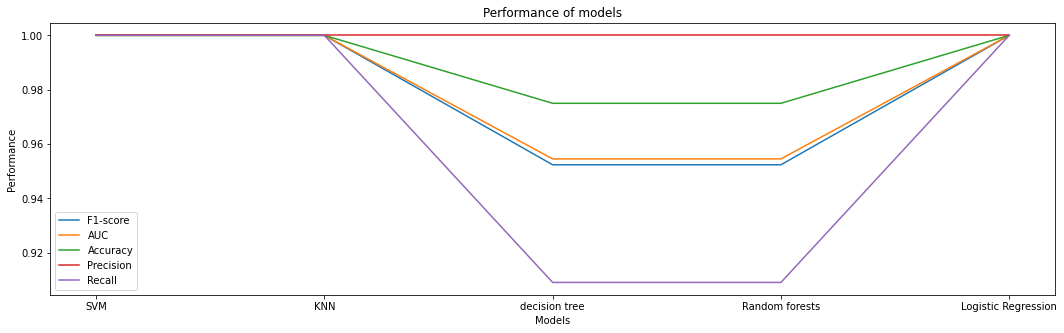

,model,Accuracy,F1-score,AUC,Precision,Recall
0,SVM,1.000,1.000000,1.000000,1.0,1.000000
1,KNN,1.000,1.000000,1.000000,1.0,1.000000
2,decision tree,0.975,0.952381,0.954545,1.0,0.909091
3,Random forests,0.975,0.952381,0.954545,1.0,0.909091
4,Logistic Regression,1.000,1.000000,1.000000,1.0,1.000000


In [572]:
plt.subplots(figsize=(18, 5))
plt.plot(test_perf['model'], test_perf['F1-score'], label = "F1-score")
plt.plot(test_perf['model'], test_perf['AUC'], label = "AUC")
plt.plot(test_perf['model'], test_perf['Accuracy'], label = "Accuracy")
plt.plot(test_perf['model'], test_perf['Precision'], label = "Precision")
plt.plot(test_perf['model'], test_perf['Recall'], label = "Recall")

plt.xlabel('Models')
plt.ylabel('Performance')
plt.title('Performance of models')
plt.legend()
plt.show()
test_perf

Here, linear models are performing strongly because records with missing values were ommitted and the dataset has only numerical features. Omitting missing values resulted in better model performance (except for tree based models) than using other methods like imputing missing values. 

Tree based models did not perform as goods as the linear models. This could be probably because

To further improve the model performances:

*   adding more training data without missing values 
*   balancing class by bootstraping, upsampling, downsampling. (or simply using stratified sampling like in the above models) could help.
*    employing feature engineering to decide and select data manipulation methods.This can help to reduce noise, or transform data so that the model will perform better.


## Further work

The Next step in this classification could be developing an ideal system to replace missing values. The usefulness of developing such a system is subjective on the cause of missing data. If the missing values represent tests  that were not performed by patients then predicting such values would be justifiable. However, these missing values could represent results that were normal and not relevent mentioning. In this case we could just map in the appropriate data.